Importing the dataset into dataframe

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('StudentsPerformance.csv')

# Display the first few rows of the dataframe
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Checking for null values in dataset to handle missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Printing Descriptive Statictics of Data

In [8]:
def descriptive_stats(df):
    """
    Calculates and returns the descriptive statistics for the numeric columns in the dataframe.
    
    Parameters:
    - df: pandas.DataFrame - The dataframe containing the data.
    
    Returns:
    - pandas.DataFrame: A dataframe containing the descriptive statistics for the numeric columns.
    """
    # Calculate descriptive statistics
    stats = df.describe()
    
    return stats

In [9]:
# Get the descriptive statistics for the dataset
descriptive_statistics = descriptive_stats(df)

# Display the descriptive statistics
print(descriptive_statistics)

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


Extracting some meanings from data to get better visualization

In [10]:
# Calculate average scores by gender
avg_scores_gender = df.groupby('gender')[['math score', 'reading score', 'writing score']].mean()

# Calculate average scores by race/ethnicity
avg_scores_race = df.groupby('race/ethnicity')[['math score', 'reading score', 'writing score']].mean()

# Calculate average scores by lunch type
avg_scores_lunch = df.groupby('lunch')[['math score', 'reading score', 'writing score']].mean()

# Display the calculated averages
print("Average Scores by Gender:\n", avg_scores_gender)
print("\nAverage Scores by Race/Ethnicity:\n", avg_scores_race)
print("\nAverage Scores by Lunch Type:\n", avg_scores_lunch)


Average Scores by Gender:
         math score  reading score  writing score
gender                                          
female   63.633205      72.608108      72.467181
male     68.728216      65.473029      63.311203

Average Scores by Race/Ethnicity:
                 math score  reading score  writing score
race/ethnicity                                          
group A          61.629213      64.674157      62.674157
group B          63.452632      67.352632      65.600000
group C          64.463950      69.103448      67.827586
group D          67.362595      70.030534      70.145038
group E          73.821429      73.028571      71.407143

Average Scores by Lunch Type:
               math score  reading score  writing score
lunch                                                 
free/reduced   58.921127      64.653521      63.022535
standard       70.034109      71.654264      70.823256


Plot for  average score vs gender

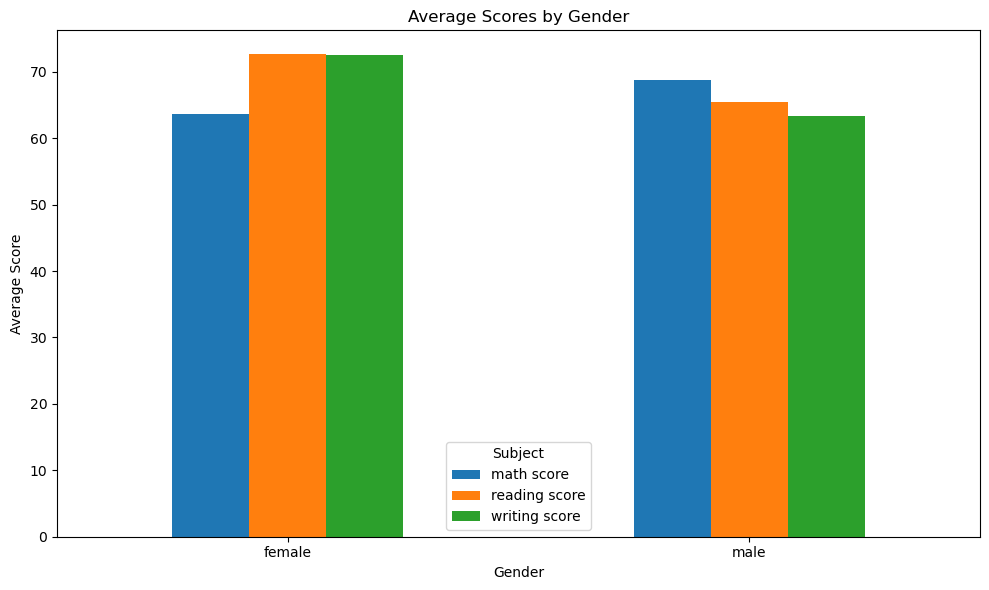

In [11]:
import matplotlib.pyplot as plt

# Plotting the average scores by gender
avg_scores_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Average Scores by Gender')
plt.ylabel('Average Score')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(title='Subject')
plt.tight_layout()

# Show plot
plt.show()


Histogram for distribution of scores

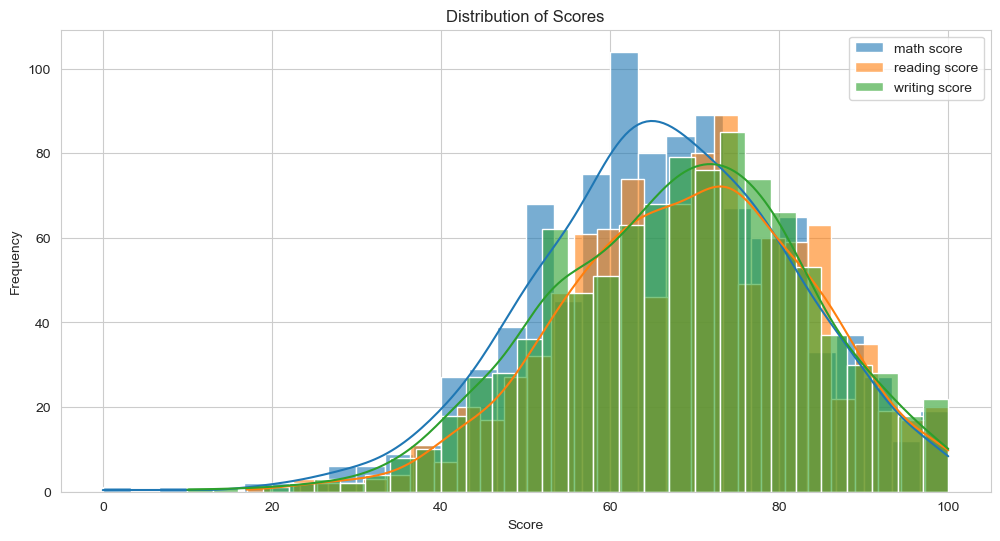

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style('whitegrid')

# Histogram for distribution of scores
plt.figure(figsize=(12, 6))
for column in ['math score', 'reading score', 'writing score']:
    sns.histplot(df[column], kde=True, label=column, bins=30, alpha=0.6)
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Bar plot for avegrae score by subject

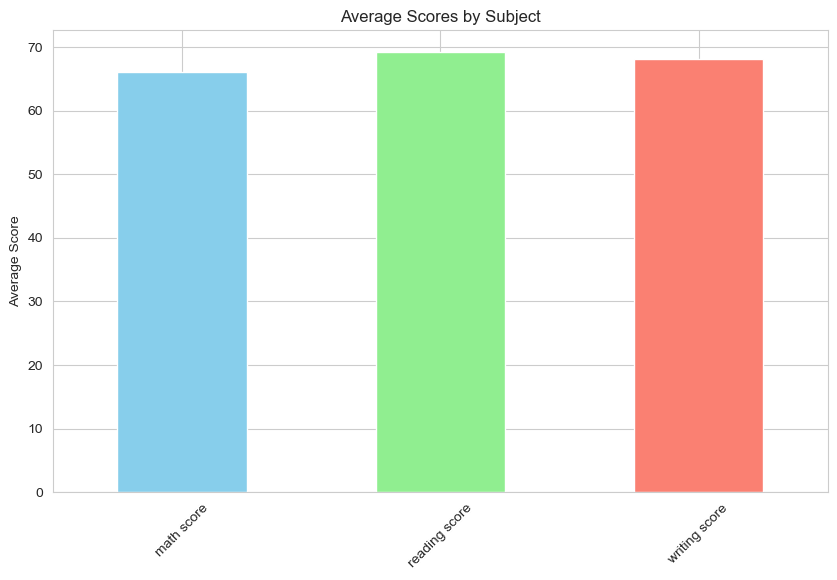

In [13]:
avg_scores = df[['math score', 'reading score', 'writing score']].mean()
avg_scores.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Scores by Subject')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


Heatmap for correlation between scores

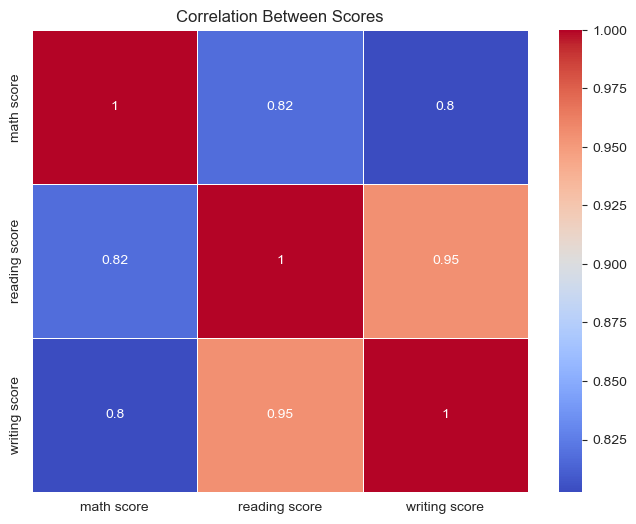

In [14]:
corr_matrix = df[['math score', 'reading score', 'writing score']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Scores')
plt.show()


Scatter plot for math and reading scores

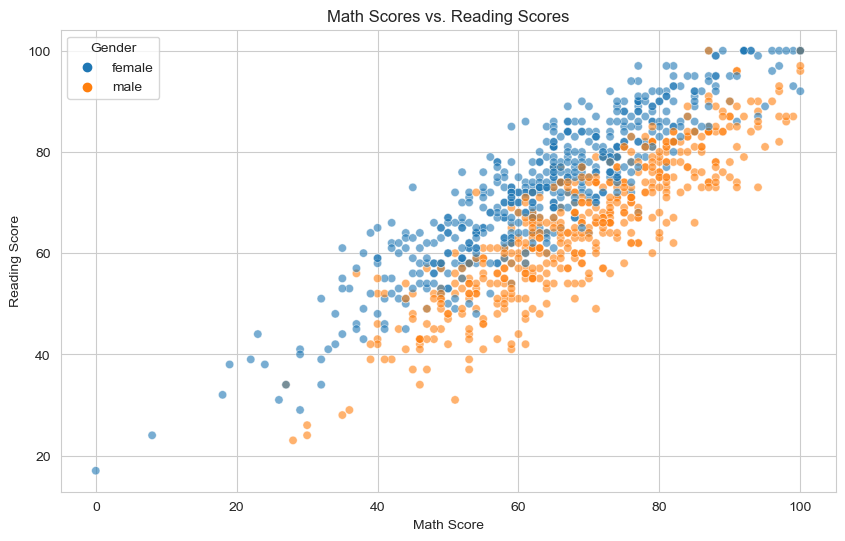

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', alpha=0.6)
plt.title('Math Scores vs. Reading Scores')
plt.xlabel('Math Score')
plt.ylabel('Reading Score')
plt.legend(title='Gender')
plt.show()
